# Finding Cats

Convolutional neural networks (cnn) are a favorite for spatial problems, such as finding images in a picture. The overall framework: _define_, _compile_, and _fit_ and well as assessment in _evalute_ remain the same. The cnn differences exist in the additional of layers in the define step of model building.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

We will use the built-in dataset _cifar10_, consisting of:

* 60,000 32x32 color images 
* 10 classes (equally represented)
* 50,000 training (equally represented)
* 10,000 test images (equally represented)

| Label | Description | 
| - | - |
| 0 | airplane | 
| 1 | car | 
| 2 | bird | 
| 3 | cat | 
| 4 | deer | 
| 5 | dog | 
| 6 | frog | 
| 7 | horse | 
| 8 | ship | 
| 9 | truck | 

https://www.tensorflow.org/tutorials/images/cnn

### Data Prep

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


Let's limit the number of rows we are working with (which will dramatically reduce the model's results in this case).

In [3]:
X_train = X_train[0:1000,:]
X_test = X_test[0:1000,:]
y_test = y_test[0:1000,:]
y_train = y_train[0:1000,:]

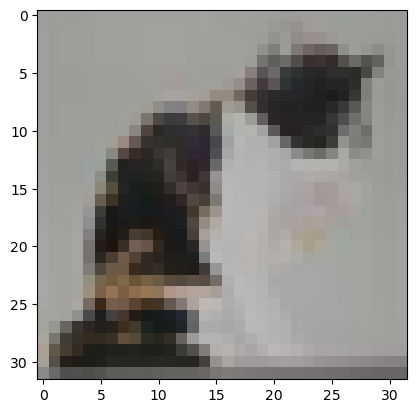

In [4]:
cat_image = X_train[785]
plt.imshow(cat_image)
plt.show()

In [5]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

#### Define

In [6]:
model = tf.keras.Sequential()

In [7]:
model.add(tf.keras.layers.Conv2D(32, (3, 3), 
                                 padding = 'same',
                                 activation='relu',
#                                 input_shape=(32, 32, 3) # We can leave input shape out, but why make the machine do the extra work?
                                ))

model.add(tf.keras.layers.MaxPooling2D((2, 2), 
                                 padding = 'same', # match input size and filter size, e.g., 5x5 with 2x2 filter
#                                 strides=1
                                      ))

model.add(tf.keras.layers.Conv2D(64, (3, 3), 
                                 padding = 'same',
                                 activation='relu'))

model.add(tf.keras.layers.MaxPooling2D((2, 2), 
                                 padding = 'same',
#                                 strides=1
                                      ))

model.add(tf.keras.layers.Conv2D(64, (3, 3), 
                                 padding = 'same',
                                 activation='relu'))


In [8]:
model.add(tf.keras.layers.Flatten()) # We do not declare the input shape - tensorflow will figure it out
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#### Complie

In [9]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

#### Fit

In [10]:
history = model.fit(X_train_scaled,y_train, 
                    epochs=10, 
                    verbose=1)

Epoch 1/10


32/32 [==============================] - 2s 11ms/step - loss: 2.2765 - accuracy: 0.1230
Epoch 2/10
32/32 [==============================] - 0s 9ms/step - loss: 2.0914 - accuracy: 0.2360
Epoch 3/10
32/32 [==============================] - 0s 9ms/step - loss: 1.8738 - accuracy: 0.3160
Epoch 4/10
32/32 [==============================] - 0s 9ms/step - loss: 1.7234 - accuracy: 0.3630
Epoch 5/10
32/32 [==============================] - 0s 8ms/step - loss: 1.6182 - accuracy: 0.4180
Epoch 6/10
32/32 [==============================] - 0s 9ms/step - loss: 1.4689 - accuracy: 0.4710
Epoch 7/10
32/32 [==============================] - 0s 8ms/step - loss: 1.3499 - accuracy: 0.5270
Epoch 8/10
32/32 [==============================] - 0s 10ms/step - loss: 1.2770 - accuracy: 0.5380
Epoch 9/10
32/32 [==============================] - 0s 9ms/step - loss: 1.1467 - accuracy: 0.5900
Epoch 10/10
32/32 [==============================] - 0s 9ms/step - loss: 1.0574 - accuracy: 0.6070


In [11]:
metrics_df = pd.DataFrame(history.history)

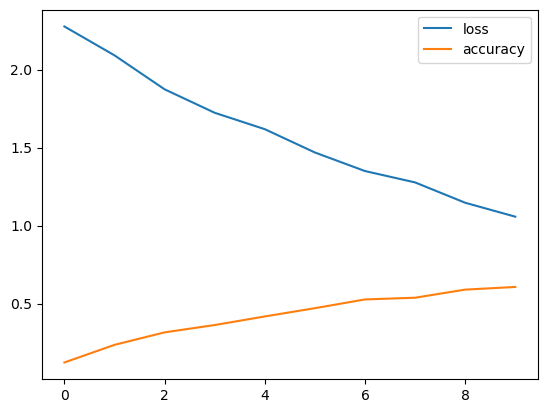

In [12]:
metrics_df[["loss","accuracy"]].plot();

#### Evaluate

In [13]:
model.evaluate(X_test_scaled, y_test, verbose=0)

[1.7338520288467407, 0.4059999883174896]

---

#### New image not in the database

In [15]:
test_image = image.load_img('cat.jpg', target_size=(32, 32, 3))

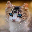

In [16]:
test_image

In [17]:
print(test_image)

<PIL.Image.Image image mode=RGB size=32x32 at 0x1A3D99042D0>


In [18]:
test_image = image.img_to_array(test_image) # create numpy 

In [19]:
print(test_image)

[[[ 27.  13.   0.]
  [ 30.  14.   1.]
  [ 31.  15.   2.]
  ...
  [ 33.  14.   0.]
  [ 41.  23.   3.]
  [ 55.  31.   7.]]

 [[ 43.  23.   0.]
  [ 46.  21.   1.]
  [ 48.  26.   2.]
  ...
  [ 61.  30.   1.]
  [ 72.  42.   4.]
  [ 95.  62.  21.]]

 [[ 64.  35.   3.]
  [ 62.  36.   1.]
  [ 79.  43.   7.]
  ...
  [ 92.  54.   7.]
  [115.  75.  23.]
  [153. 112.  48.]]

 ...

 [[128. 113. 106.]
  [136. 123. 115.]
  [143. 122. 119.]
  ...
  [146. 133. 143.]
  [111. 100. 108.]
  [106.  93. 100.]]

 [[114. 102.  90.]
  [123. 113. 104.]
  [123. 108. 105.]
  ...
  [103.  97.  97.]
  [ 96.  83.  90.]
  [101.  84.  92.]]

 [[126. 113. 107.]
  [139. 128. 126.]
  [136. 127. 128.]
  ...
  [114. 101. 108.]
  [102.  96.  98.]
  [ 94.  85.  88.]]]


In [20]:
test_image.shape

(32, 32, 3)

In [21]:
test_image = np.expand_dims(test_image, axis=0) # add dimension to appear as a vector of images

In [22]:
test_image

array([[[[ 27.,  13.,   0.],
         [ 30.,  14.,   1.],
         [ 31.,  15.,   2.],
         ...,
         [ 33.,  14.,   0.],
         [ 41.,  23.,   3.],
         [ 55.,  31.,   7.]],

        [[ 43.,  23.,   0.],
         [ 46.,  21.,   1.],
         [ 48.,  26.,   2.],
         ...,
         [ 61.,  30.,   1.],
         [ 72.,  42.,   4.],
         [ 95.,  62.,  21.]],

        [[ 64.,  35.,   3.],
         [ 62.,  36.,   1.],
         [ 79.,  43.,   7.],
         ...,
         [ 92.,  54.,   7.],
         [115.,  75.,  23.],
         [153., 112.,  48.]],

        ...,

        [[128., 113., 106.],
         [136., 123., 115.],
         [143., 122., 119.],
         ...,
         [146., 133., 143.],
         [111., 100., 108.],
         [106.,  93., 100.]],

        [[114., 102.,  90.],
         [123., 113., 104.],
         [123., 108., 105.],
         ...,
         [103.,  97.,  97.],
         [ 96.,  83.,  90.],
         [101.,  84.,  92.]],

        [[126., 113., 107.],
       

In [23]:
test_image.shape

(1, 32, 32, 3)

In [24]:
prediction = model.predict(test_image)

1/1 [==============================] - 0s 127ms/step


In [25]:
prediction[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

| Label | Description | 
| - | - |
| 0 | airplane | 
| 1 | car | 
| 2 | bird | 
| 3 | cat | 
| 4 | deer | 
| 5 | dog | 
| 6 | frog | 
| 7 | horse | 
| 8 | ship | 
| 9 | truck | 

https://www.tensorflow.org/tutorials/images/cnn

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=073a5ba6-5e7f-487e-b570-b959ffadafe0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>